In [1]:
#importing libraries for model building 
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity 
from wordcloud import WordCloud

In [2]:
# Get a list of student files 
student_file = [file for file in os.listdir() if file.endswith('.txt')] 

# Read the content of each student's file 
student_docs = [open(file).read() for file in student_file] 

# Print the list of student files and their content 
for filename, document in zip(student_file, student_docs): 
	print(f"File: {filename}") 
	print("Content:") 
	print(document) 
	print("-" * 30) # Separator between documents 

File: john.txt
Content:
t is a long established fact that a reader will be distracted by the readable content of
a page when looking at its layout.
The point of using Lorem Ipsum
------------------------------
File: juma.txt
Content:
t is a long established fact that a reader will
be distracted by the readable content of a
page when looking at its layout. The point of using Lorem Ipsum
------------------------------
File: fatma.txt
Content:
Lorem Ipsum is simply dummy text of the printing and typesetting industry.
Lorem Ipsum has been the industry's
standard dummy text ever since the 1500s,
------------------------------
File: doc4.txt
Content:
Machine learning and artificial intelligence are revolutionary fields in computer science.
With rapid technological progress, these fields are transforming industries by enabling data-driven decision making.
------------------------------
File: doc1.txt
Content:
Artificial intelligence is a field of computer science focused on creating intellige

In [3]:
# Function to create TF-IDF vectors from a list of documents 
def create_tfidf_vectors(docs): 
	return TfidfVectorizer().fit_transform(docs).toarray() 

# Function to calculate cosine similarity between two document vectors 
def calc_cosine_similarity(vector1, vector2): 
	return cosine_similarity([vector1, vector2]) 

# Create TF-IDF vectors for the student documents 
doc_vec = create_tfidf_vectors(student_docs) 
# Pair each document with its corresponding filename 
doc_filename_pairs = list(zip(student_file, doc_vec)) 


In [4]:
# Function to check for plagiarism 
def find_plagiarism(): 
	# Initialize an empty set to store plagiarism results 
	plagiarism_results = set() 

	# Access the global variable doc_filename_pairs 
	global doc_filename_pairs 

	# Iterate through each student's file and vector 
	for student_a_file, student_a_vec in doc_filename_pairs: 
		# Create a copy of the document-filename pairs for iteration 
		remaining_pairs = doc_filename_pairs.copy() 

		# Find the index of the current document-filename pair 
		current_index = remaining_pairs.index((student_a_file, student_a_vec)) 

		# Remove the current pair from the remaining pairs 
		del remaining_pairs[current_index] 

		# Iterate through the remaining pairs to compare with other students 
		for student_b_file, student_b_vec in remaining_pairs: 
			# Calculate the cosine similarity between student_a_vec and student_b_vec 
			similarity_score = calc_cosine_similarity( 
				student_a_vec, student_b_vec)[0][1] 

			# Sort the filenames to maintain consistency in results 
			sorted_filenames = sorted((student_a_file, student_b_file)) 

			# Create a plagiarism result tuple with sorted filenames and similarity score 
			plagiarism_result = ( 
				sorted_filenames[0], sorted_filenames[1], similarity_score) 

			# Add the result to the plagiarism_results set 
			plagiarism_results.add(plagiarism_result) 

	# Return the set of plagiarism results 
	return plagiarism_results 


# Print plagiarism results 
plagiarism_results = find_plagiarism() 
sorted_results = sorted(plagiarism_results, key=lambda x: x[2], reverse=True)
for result in sorted_results:
    print(result)

('john.txt', 'juma.txt', 1.0000000000000004)
('doc1.txt', 'doc2.txt', 0.32416272480750274)
('fatma.txt', 'john.txt', 0.23457760691609017)
('fatma.txt', 'juma.txt', 0.23457760691609017)
('doc1.txt', 'doc3.txt', 0.20375074922041916)
('doc2.txt', 'doc4.txt', 0.19650040480551204)
('doc2.txt', 'doc3.txt', 0.1749208244592473)
('doc3.txt', 'doc4.txt', 0.1674815703887244)
('doc1.txt', 'doc4.txt', 0.11965655644454137)
('doc1.txt', 'fatma.txt', 0.1147581647715071)
('doc1.txt', 'john.txt', 0.10296379055241586)
('doc1.txt', 'juma.txt', 0.10296379055241586)
('doc3.txt', 'fatma.txt', 0.06414057358967386)
('doc2.txt', 'juma.txt', 0.06392121087614643)
('doc2.txt', 'john.txt', 0.06392121087614643)
('doc3.txt', 'john.txt', 0.041369397042872)
('doc3.txt', 'juma.txt', 0.041369397042872)
('doc4.txt', 'john.txt', 0.02525142084302525)
('doc4.txt', 'juma.txt', 0.02525142084302525)
('doc2.txt', 'fatma.txt', 0.023752082353831142)
('doc4.txt', 'fatma.txt', 0.014405777731758756)


## Heatmap Visualization

In [5]:
# Extract unique filenames for index/columns in the DataFrame
filenames = sorted({result[0] for result in plagiarism_results}.union({result[1] for result in plagiarism_results}))

# Create an empty DataFrame with filenames as both rows and columns
similarity_matrix = pd.DataFrame(np.nan, index=filenames, columns=filenames)

# Fill in the similarity matrix based on the results
for file_a, file_b, score in plagiarism_results:
    similarity_matrix.loc[file_a, file_b] = score
    similarity_matrix.loc[file_b, file_a] = score  # Fill both [a,b] and [b,a] for symmetry

# Fill diagonal with 1s since each file is identical to itself
np.fill_diagonal(similarity_matrix.values, 1)

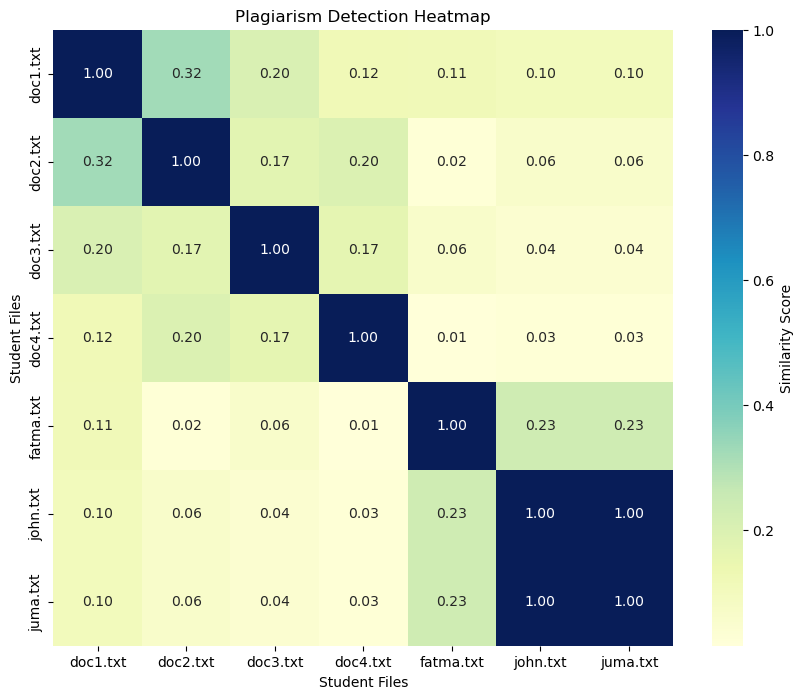

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Similarity Score'}, fmt=".2f")
plt.title("Plagiarism Detection Heatmap")
plt.xlabel("Student Files")
plt.ylabel("Student Files")
plt.show()

## Word Cloud Visualization

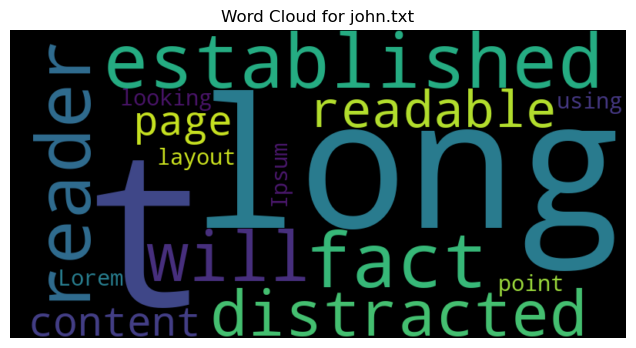

In [7]:
# Function to generate a word cloud for a document 
def generate_word_cloud(document_text, filename): 
	# Create a word cloud from the document text 
	wordcloud = WordCloud(width=800, height=400).generate(document_text) 

	# Create a figure to display the word cloud 
	plt.figure(figsize=(8, 4)) 

	# Display the word cloud as an image with bilinear interpolation 
	plt.imshow(wordcloud, interpolation='bilinear') 

	# Set the title of the word cloud figure to include the filename 
	plt.title(f'Word Cloud for {filename}') 

	# Turn off axis labels and ticks 
	plt.axis('off') 

	# Show the word cloud visualization 
	plt.show() 


# Find plagiarism among student documents and store the results 
plagiarism_results = find_plagiarism() 

# Iterate through plagiarism results 
for result in plagiarism_results: 
	# Check if the similarity score is greater than or equal to 0.5 (adjust as needed) 
	if result[2] >= 0.5: 
		# Generate and display a word cloud for the document with similarity above the threshold 
		generate_word_cloud(open(result[0]).read(), result[0]) 

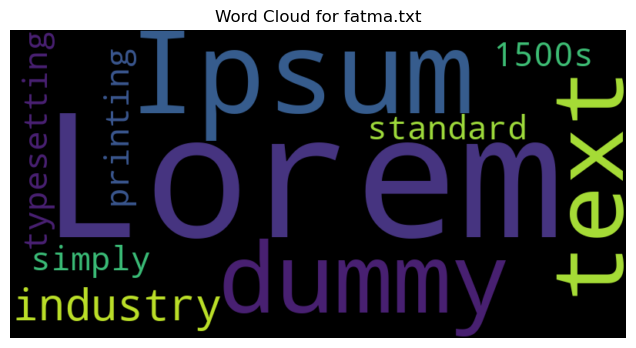

In [8]:
# Specify the target document filename 
target_document = "fatma.txt"

# Iterate through pairs of filenames and document vectors 
for filename, document_vector in doc_filename_pairs: 
	# Check if the current filename matches the target_document 
	if filename == target_document: 
		# Generate a word cloud for the target document 
		generate_word_cloud(open(filename).read(), filename) 

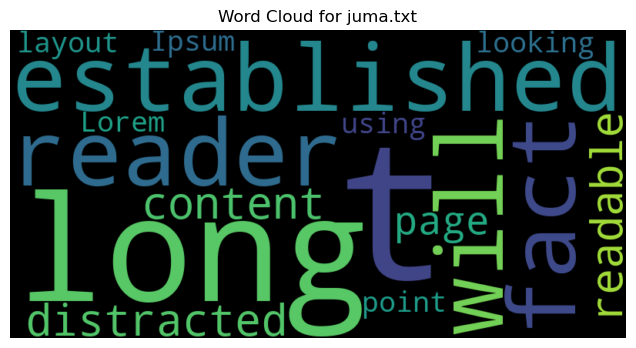

In [9]:
# Specify the target document filename 
target_document = "juma.txt"

# Iterate through pairs of filenames and document vectors 
for filename, document_vector in doc_filename_pairs: 
	# Check if the current filename matches the target_document 
	if filename == target_document: 
		# Generate a word cloud for the target document 
		generate_word_cloud(open(filename).read(), filename) 


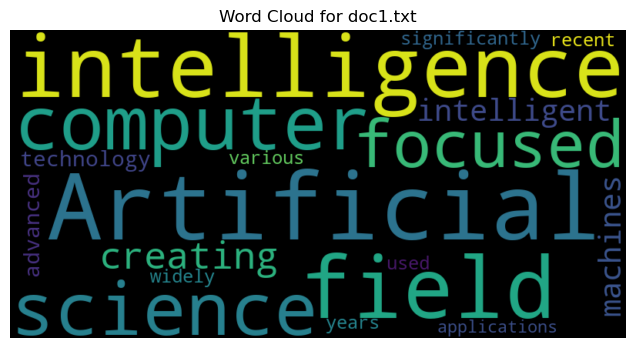

In [10]:
# Specify the target document filename 
target_document = "doc1.txt"

# Iterate through pairs of filenames and document vectors 
for filename, document_vector in doc_filename_pairs: 
	# Check if the current filename matches the target_document 
	if filename == target_document: 
		# Generate a word cloud for the target document 
		generate_word_cloud(open(filename).read(), filename) 

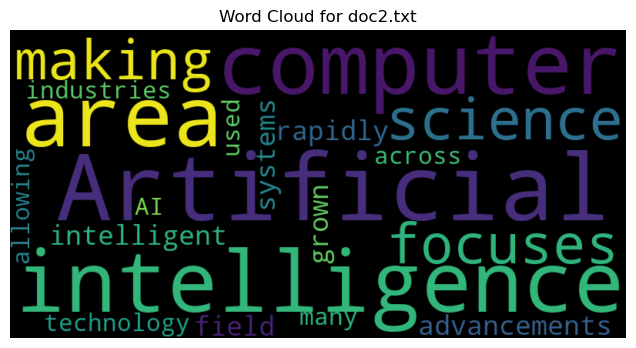

In [11]:
# Specify the target document filename 
target_document = "doc2.txt"

# Iterate through pairs of filenames and document vectors 
for filename, document_vector in doc_filename_pairs: 
	# Check if the current filename matches the target_document 
	if filename == target_document: 
		# Generate a word cloud for the target document 
		generate_word_cloud(open(filename).read(), filename) 

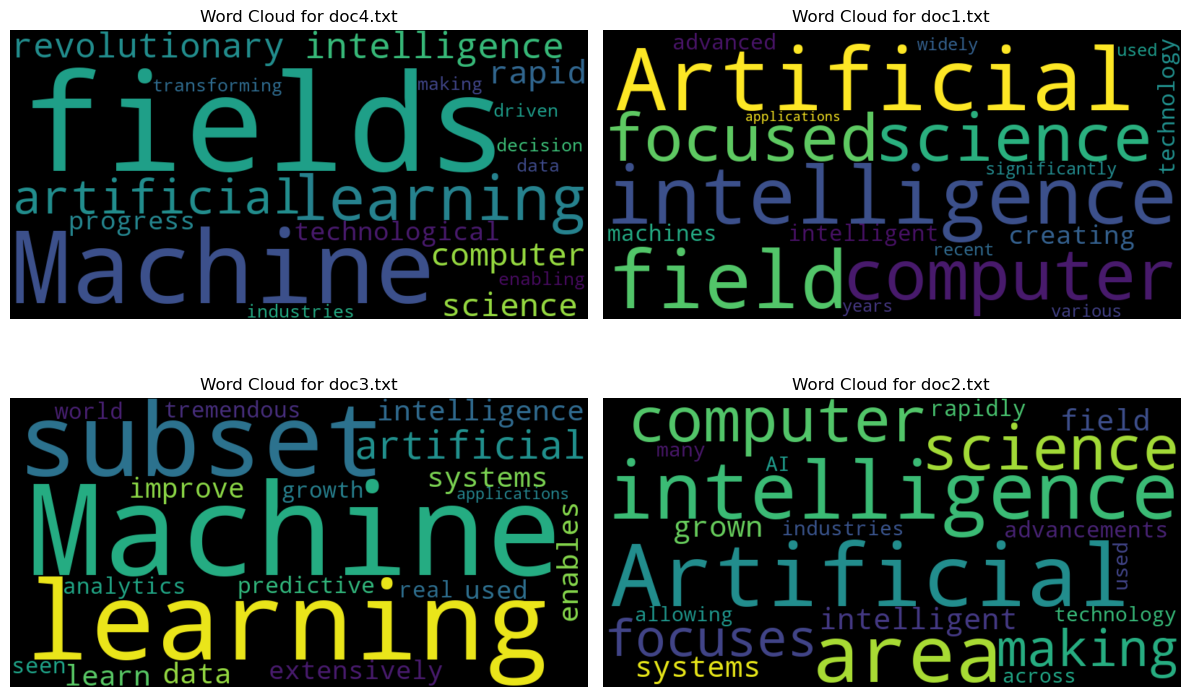

In [12]:
# Compare doc1.txt, doc2.txt, doc3.txt, and doc4.txt
selected_files = ['doc1.txt', 'doc2.txt', 'doc3.txt', 'doc4.txt']
filtered_doc_pairs = [(filename, vec) for filename, vec in doc_filename_pairs if filename in selected_files]

# Function to generate and display word clouds for specific documents
def generate_word_clouds(doc_filename_pairs):
    # Set up a 2x2 grid specifically for four documents
    plt.figure(figsize=(12, 8))
    
    # Iterate over the filtered document pairs to generate a word cloud for each
    for i, (filename, _) in enumerate(doc_filename_pairs, 1):
        # Read the content of the document
        document_text = open(filename).read()
        
        # Generate the word cloud
        wordcloud = WordCloud(width=800, height=400).generate(document_text)
        
        # Add each word cloud to the subplot
        plt.subplot(2, 2, i)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for {filename}')
        plt.axis('off')
    
    # Display the figure with all word clouds
    plt.tight_layout()
    plt.show()

# Generate word clouds for doc1, doc2, doc3, and doc4
generate_word_clouds(filtered_doc_pairs)
